# 1. Imports

In [12]:
import pandas as pd
import json
import os
import copy
import time
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import ruptures as rpt

# 2. Loading data

## 2.1 Identify id:s for Liverpool games

In [13]:
# path = 'C:\\Users\\johnl\\Documents\\GitHub\\opendata\\data\\matches.json'

# with open(path) as f:
#     data = json.load(f)

# # print(json.dumps(data, indent=4, sort_keys=True))

# # Manually found that the Liverpool games has id's 4039 and 2440

path = 'C:\\Users\\jakes\\Desktop\\Data Science\\Mathematical Modelling in Football\\Group Project\\Data\\SkillCorner\\opendata-master\\data\\matches'

id1 = '\\4039'
id2 = '\\2440'

## 2.2 Create player dict

In [18]:
def create_player_dicts(path, match_id):

    with open(path + '\\' + match_id + '\\match_data.json') as f:
        data = json.load(f)

    name_dict = {}
    for player in data['players']:
        obj_id = player['trackable_object']
        first_name = player['first_name']
        last_name = player['last_name']
        name_dict[obj_id] = first_name + ' ' + last_name

    lfc_dict = {}
    lfc_list = []
    if data['id'] == 4039:
        lfc_id = data['away_team']['id']
        for player in data['players']:
            if player['team_id'] == lfc_id:
                obj_id = player['trackable_object']
                first_name = player['first_name']
                last_name = player['last_name']
                lfc_dict[obj_id] = first_name + ' ' + last_name
                lfc_list.append(obj_id)

    return name_dict, lfc_dict, lfc_list

In [19]:
name_dict, lfc_dict, lfc_list = create_player_dicts(path, match_id=id1)

## 2.3 Load and explore tracking data 

In [20]:
def load_tracking_data(path, match_id, name_dict):
    
    with open(path + match_id + '\\structured_data.json') as f:
        data = json.load(f)
    
    df = pd.DataFrame( columns = [i for i in name_dict.keys()] )
    
    new_frame = {}
    for i in df.columns:
        new_frame[i] = None

    li =  []
    for frame in data:
        frame_nr = frame['frame']
        curr_frame = copy.deepcopy(new_frame)
        for obj in frame['data']:
            x = obj['x']
            y = obj['y']
            try:
                obj_id = obj['trackable_object']
                curr_frame[obj_id] = (x, y)
            except:
                None
        row = pd.Series(curr_frame, name = frame_nr)
        li.append(curr_frame)

    df = pd.DataFrame(li)
    
    return df

In [21]:
df = load_tracking_data(path, id1, name_dict)

In [22]:
def create_lfc_dict(df, lfc_list):
    lfc_df = df[lfc_list]

    for col in lfc_df.columns:
        player_df = lfc_df[col]
        p = len([i for i in player_df if i!= None])/len(player_df)
        #if p == 0.0:
        #    lfc_df = lfc_df.drop(columns=col)

    lfc_list = [i for i in lfc_df.columns]
    
    return lfc_df, lfc_list

In [23]:
lfc_df, lfc_list = create_lfc_dict(df, lfc_list)

In [24]:
# col_list = []
# p_list = []
# for col in df.columns:
#     player_df = df[col]
#     p = len([i for i in player_df if i!= None])/len(player_df)
#     # print(col, p)
#     col_list.append(str(col))
#     p_list.append(p)

# plt.bar(x=col_list, height=p_list)

<BarContainer object of 20 artists>

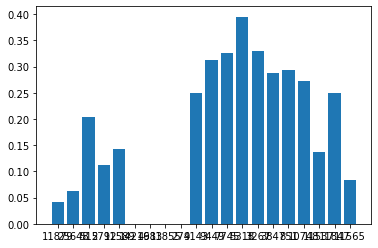

In [25]:
col_list = []
p_list = []
for col in lfc_df.columns:
    player_df = lfc_df[col]
    p = len([i for i in player_df if i!= None])/len(player_df)
    # print(col, p)
    col_list.append(str(col))
    p_list.append(p)

plt.bar(x=col_list, height=p_list)

Obviously, for all players, more than half of the game is not covered by the broadcast data. This is a clear limitation. However, the most important parts of the games (i.e. those when they are close to the ball) is likely to be the ones visible in the broadcast and this may thus not be a huge problem. It is not likely that players far from the ball will run as quick as the ones close to the ball.

**To investigate:**
* Ways to interpolate player positions

# 3. Velocity

## 3.1 Compute velocities 

In [26]:
'''
Manually checked the time intervals. dt = 0.1 seconds
'''


# with open('C:\\Users\\johnl\\Documents\\GitHub\\opendata\\data\\matches\\4039\\structured_data.json') as f:
#         data = json.load(f)

# [frame['time'] for frame in data]

dt = 0.1

In [27]:
# lfc_df_numeric = lfc_df.fillna(value=np.nan)

lfc_cords = pd.DataFrame()

for col in lfc_df.columns:
    x_list = []
    y_list = []
    for i in lfc_df[col]:
        if i == None:
            x_list.append(np.nan)
            y_list.append(np.nan)
        else:
            x_list.append(i[0])
            y_list.append(i[1])
    x_col = str(col)+'_x'
    y_col = str(col)+'_y'
    lfc_cords[x_col] = x_list
    lfc_cords[y_col] = y_list

lfc_cords

,11879_x,11879_y,25648_x,25648_y,515_x,515_y,2792_x,2792_y,11589_x,11589_y,...,851_x,851_y,10748_x,10748_y,11537_x,11537_y,11847_x,11847_y,11565_x,11565_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
lfc_cords_diff = lfc_cords.diff(periods=1, axis=0)
lfc_cords_diff

,11879_x,11879_y,25648_x,25648_y,515_x,515_y,2792_x,2792_y,11589_x,11589_y,...,851_x,851_y,10748_x,10748_y,11537_x,11537_y,11847_x,11847_y,11565_x,11565_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
vel_lfc_df = pd.DataFrame()

for i in lfc_list:
    dx_col = str(i)+'_x'
    dy_col = str(i)+'_y'
    dx = lfc_cords_diff[dx_col]
    dy = lfc_cords_diff[dy_col]
    v = np.sqrt(dx**2 + dy**2)/dt
    
    for j in range(len(v)):
        if v[j] > 12.5: # Usain Bolt's top speed
            v[j] = np.nan
    
    vel_lfc_df[i] = v

vel_lfc_df

,11879,25648,515,2792,11589,14219,4683,11855,274,9143,9449,7745,5318,3267,3847,851,10748,11537,11847,11565
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<BarContainer object of 20 artists>

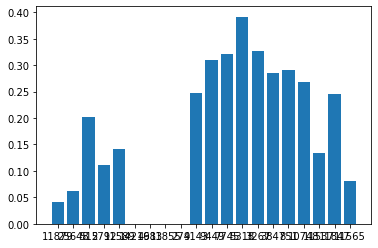

In [30]:
# new check after dropping outlier velocities

p_list2 = [i for i in vel_lfc_df.count()/len(vel_lfc_df)]
col_list2 = [str(i) for i in vel_lfc_df.columns]

plt.bar(x=col_list2, height=p_list2)

In [31]:
# printing how much data (as proportion of total frames in the game) is dropped due to the removing of outliers
assert len(p_list) == len(p_list2)

for i in range(len(p_list)):
    print(p_list[i]-p_list2[i])

0.0004391357807834173
0.0008050822647696007
0.0021956789039170865
0.0013613209204286075
0.0015076995140230753
0.0
0.0
0.0
0.0
0.002737279700216616
0.0033081562152350585
0.004069324901926352
0.003776567714737389
0.003366707652672829
0.0028251068563732717
0.0036301891211428794
0.003147139762281148
0.001551613092101417
0.0028397447157327838
0.0013759587797880363


Relatively little data seem to be dropped by removing the outliers which is a sign that we do not lose much valuable information by doing it. It seems reasonable to assume that the benfits of getting rid of obvious outlier speeds outweighs the fact that we get even less data. Hopefully, we can solve some of these gaps by using smoothing later on.

## 3.2 Smoothing of velocities 

In [32]:
smoothed_vel_lfc_df = pd.DataFrame()

n = len(vel_lfc_df)
w = 3

t0 = time.time()
for player in lfc_list:
    v_smoothed = [] 
    for j in range(n):
        try:
            v_smoothed.append( np.mean(vel_lfc_df[player][j-w+1:j+1]) )
        except:
            v_smoothed[j].append( vel_lfc_df[player][j] )
    smoothed_vel_lfc_df[player] = v_smoothed
print(time.time()-t0)

vel_lfc_df

177.662456035614


,11879,25648,515,2792,11589,14219,4683,11855,274,9143,9449,7745,5318,3267,3847,851,10748,11537,11847,11565
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
smoothed_vel_lfc_df

,11879,25648,515,2792,11589,14219,4683,11855,274,9143,9449,7745,5318,3267,3847,851,10748,11537,11847,11565
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.2.1 Smoothing data

In [34]:
import scipy.signal as signal
calc_df = lfc_cords_diff # new data frame not to intefere with the rest

# Compute distance, raw velocity and velocity with various smoothing filters
for i in lfc_dict:
    calc_df[str(i)+'_dist'] = np.sqrt(calc_df[str(i)+'_x']**2 + calc_df[str(i)+'_y']**2)
    calc_df[str(i)+'_speed'] = calc_df[str(i)+'_dist']/0.1
    calc_df[str(i)+'_speed'] = calc_df[str(i)+'_speed'].apply(lambda x: np.nan if x > 12 else x) # Usain Bolt filter
    calc_df[str(i)+'_acc'] = calc_df[str(i)+'_speed'].diff()/0.1
    calc_df[str(i)+'_SG3_speed'] = signal.savgol_filter(calc_df[str(i)+'_speed'], 3, 1, mode='nearest')    
    calc_df[str(i)+'_SG5_speed'] = signal.savgol_filter(calc_df[str(i)+'_speed'], 5, 1, mode='nearest')
    #calc_df[str(i)+'_SG7_speed'] = signal.savgol_filter(calc_df[str(i)+'_speed'], 7, 1, mode='nearest')
    #calc_df[str(i)+'_SG9_speed'] = signal.savgol_filter(calc_df[str(i)+'_speed'], 9, 1, mode='nearest')
    calc_df[str(i)+'_SG5_acc'] = calc_df[str(i)+'_SG5_speed'].diff()/0.1
    calc_df[str(i)+'_SG3_SG5_acc'] = signal.savgol_filter(calc_df[str(i)+'_SG5_acc'], 3, 1, mode='nearest')

findfont: Font family ['Candara'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Candara'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Candara'] not found. Falling back to DejaVu Sans.


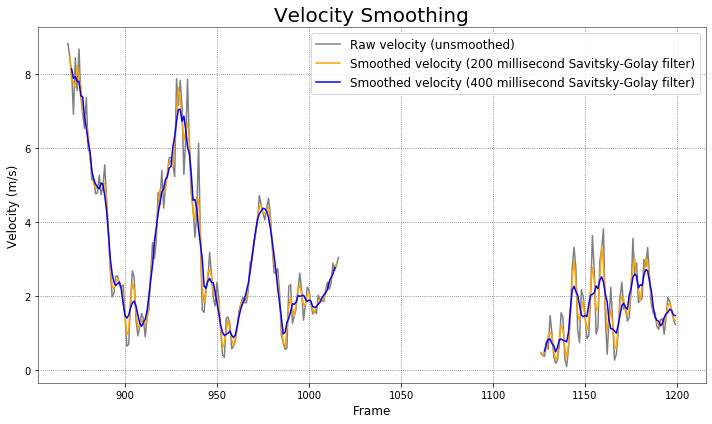

In [35]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6
rcParams['axes.linewidth'] = 0.5
plt.rcParams["font.family"] = "Candara"

# Velocity plot
plt.plot(calc_df[800:1200]['5318_speed'], label='Raw velocity (unsmoothed)', color='gray')
plt.plot(calc_df[800:1200]['5318_SG3_speed'], label='Smoothed velocity (200 millisecond Savitsky-Golay filter)', color='orange')
plt.plot(calc_df[800:1200]['5318_SG5_speed'], label='Smoothed velocity (400 millisecond Savitsky-Golay filter)', color='blue')
#plt.plot(calc_df[800:1200]['5318_SG7_speed'], label='Smoothed velocity (600 millisecond Savitsky-Golay filter)', color='blue')
#plt.plot(calc_df[800:1200]['5318_SG9_speed'], label='Smoothed velocity (800 millisecond Savitsky-Golay filter)', color='blue')
plt.legend(fontsize=12)
plt.grid(True, color = 'dimgray', linestyle='dotted')
plt.title("Velocity Smoothing", fontsize=20)
plt.xlabel('Frame', fontsize=12)
plt.ylabel('Velocity (m/s)', fontsize=12)
plt.tight_layout()

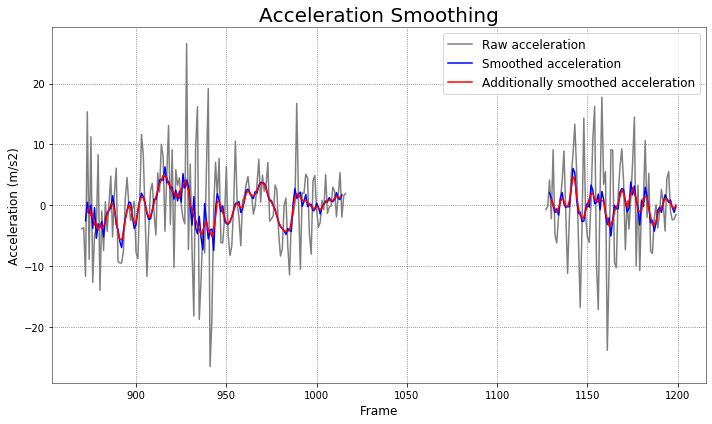

In [36]:
# Acceleration plot
plt.plot(calc_df[800:1200]['5318_acc'], label='Raw acceleration', color='gray')
plt.plot(calc_df[800:1200]['5318_SG5_acc'], label='Smoothed acceleration', color='blue')
plt.plot(calc_df[800:1200]['5318_SG3_SG5_acc'], label='Additionally smoothed acceleration', color='red')
plt.legend(fontsize=12)
plt.grid(True, color = 'dimgray', linestyle='dotted')
plt.title("Acceleration Smoothing", fontsize=20)
plt.xlabel('Frame', fontsize=12)
plt.ylabel('Acceleration (m/s2)', fontsize=12)
plt.tight_layout()

In [37]:
# Savitsky-Golay 5 window filter for velocity 
# Additional filter improvement but not strictly necessary

## 3.3 Decompose into speed zones

In [38]:
def dist_per_speed_zone(vel_df, player_id, bins):
    x = vel_df[player_id]
    w = len(x)*[0.1]
    
    n = plt.hist(x, bins = bins, weights = w)
    
    return n

(array([1444.7, 1045.7,  209.4,   21.1,    1.7]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5]),
 <a list of 5 Patch objects>)

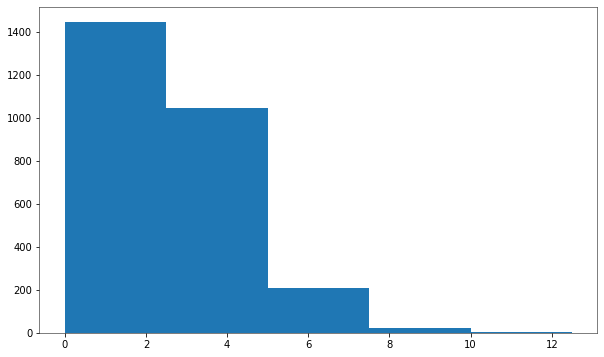

In [39]:
player_id = 5318
bins = [0,2.5,5,7.5,10,12.5]

dist_per_speed_zone(smoothed_vel_lfc_df, player_id, bins)

In [40]:
def distance_in_speed_zone(vel_df, player_id, min_speed, max_speed):
    return sum( vel_df[player_id].between(min_speed, max_speed) ) /10

In [41]:
player_id = 5318
min_speed = 2
max_speed = 8

distance_in_speed_zone(smoothed_vel_lfc_df, player_id, min_speed, max_speed)

1534.3

## 3.4 Identify sprints 

In [42]:
# Used for summary statistics
dist_df = calc_df.loc[:, calc_df.columns.str.contains('dist')]
speed_df = calc_df.loc[:, calc_df.columns.str.contains('SG5_speed')]
acc_df = calc_df.loc[:, calc_df.columns.str.contains('SG3_SG5_acc')]

In [43]:
# Compute minutes played, removing half time duration and benched mins
def mins_on_pitch(data):
    if data.start_index > ht_start_frame + 1000 and data.end_index > len(dist_df) - 100:
        return (len(dist_df) - data.start_index)*0.1/60 # sub on mins
    else:
        return (data.end_index - ht_interval)*0.1/60

In [44]:
# Change depending on game data loaded
ht_start_frame = 29070
ht_end_frame = 38948
ht_interval = ht_end_frame - ht_start_frame

summary_stats = pd.DataFrame.from_dict(lfc_dict, orient ='index')
summary_stats = summary_stats.rename(columns = {0: 'name'})
summary_stats['start_index'] = np.array(dist_df.apply(lambda col: col.first_valid_index()))
summary_stats['end_index'] = np.array(dist_df.apply(lambda col: col.last_valid_index()))     
summary_stats['mins'] = summary_stats.apply(mins_on_pitch, axis = 1)
#summary_stats['startXI'] = summary_stats['start_index'].apply(lambda x: 1 if x < ht_start_frame else 0)
summary_stats['mins_visible'] = (len(dist_df) - np.array(dist_df.isna().sum()))*0.1/60

In [45]:
# Summary statistics
assumed_walk_speed = 1.5

summary_stats['obs_dist'] = np.array(speed_df.sum())/10/1000 # players in camera shot
summary_stats['unobs_dist'] = (summary_stats.mins - summary_stats.mins_visible)*60*assumed_walk_speed/1000 # players out of camera shot
summary_stats['total_dist'] = summary_stats.obs_dist + summary_stats.unobs_dist # Assumed alking speed 1.5m/s for off camera movement
summary_stats['max_speed'] = np.array(speed_df.max())
summary_stats['max_speed_99pc'] = np.array(speed_df.quantile(0.99)) # Results seem better, except Salah being lower than expected
summary_stats['max_acc'] = np.array(acc_df.max())
summary_stats['max_acc_99pc'] = np.array(acc_df.quantile(0.99)) # Unsure about these values... check with other games

In [46]:
# Speed threshold distances

summary_stats['walk_dist'] = np.array(speed_df[(speed_df > 0) & (speed_df <= 2)].sum()/10/1000)
summary_stats['jog_dist'] = np.array(speed_df[(speed_df > 2) & (speed_df <= 4)].sum()/10/1000)
summary_stats['run_dist'] = np.array(speed_df[(speed_df > 4) & (speed_df <= 7)].sum()/10/1000)
summary_stats['sprint_dist'] = np.array(speed_df[speed_df >= 7].sum()/10/1000)

In [47]:
summary_stats

,name,start_index,end_index,mins,mins_visible,obs_dist,unobs_dist,total_dist,max_speed,max_speed_99pc,max_acc,max_acc_99pc,walk_dist,jog_dist,run_dist,sprint_dist
11879,Minamino Takumi,62583.0,68315.0,9.555000,4.625000,0.753845,0.44370,1.197545,7.983417,7.221394,7.795393,5.107137,0.133177,0.266321,0.312598,0.041750
25648,Neco Williams,57262.0,68287.0,18.423333,7.003333,1.212494,1.02780,2.240294,9.332290,7.428780,11.966307,4.954220,0.182338,0.437093,0.516595,0.076469
515,Alex Oxlade-Chamberlain,38839.0,68255.0,49.128333,22.925000,3.431088,2.35830,5.789388,9.324535,7.195826,14.056283,4.572723,0.675993,1.536455,1.091544,0.127097
2792,Divock Origi,49044.0,68236.0,32.120000,12.625000,1.942492,1.75455,3.697042,10.127846,7.957920,14.045320,5.741114,0.387126,0.671701,0.735950,0.147716
11589,Naby Keita,48855.0,68253.0,32.435000,16.036667,2.505146,1.47585,3.980996,8.166987,6.769735,14.283697,4.933940,0.427178,1.154142,0.880178,0.043647
14219,Harvey Elliott,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
4683,James Milner,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
11855,Curtis Jones,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
274,Adrian,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
9143,Roberto Firmino,450.0,48256.0,63.963333,28.255000,4.735335,3.21375,7.949085,10.104305,7.715742,13.011944,4.744404,0.627202,1.961003,1.869230,0.277900


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Distance (km)'),
 Text(0.5, 1.0, 'Distance covered: Observed (green)/Assumed (grey)')]

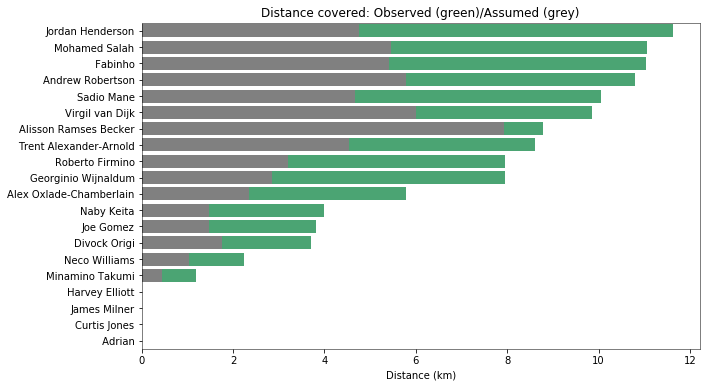

In [48]:
import seaborn as sns

### Distance covered visualization
ax_top = sns.barplot(y = 'name',
                     x = 'total_dist',
                     data = summary_stats,
                     order = summary_stats.sort_values('total_dist', ascending = False).name, 
                     color = 'mediumseagreen')
ax_bottom = sns.barplot(y = 'name',
                        x = 'unobs_dist',
                        data = summary_stats,
                        order = summary_stats.sort_values('total_dist', ascending = False).name, 
                        color = 'grey')

ax_top.set(xlabel='Distance (km)', ylabel='', title = 'Distance covered: Observed (green)/Assumed (grey)')
###


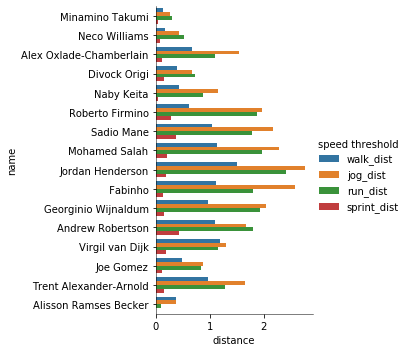

In [49]:
### Absolute speed threshold visualization
cols = ['name', 'walk_dist', 'jog_dist', 'run_dist', 'sprint_dist']
speed_thres = summary_stats.loc[:,cols]
speed_thres = speed_thres[(speed_thres != 0)]
speed_thres = speed_thres.dropna()
speed_thres = pd.melt(speed_thres, id_vars="name", var_name="speed threshold", value_name="distance")

ax = sns.catplot(y = 'name',
            x = 'distance',
            hue = 'speed threshold',
            data = speed_thres,
            kind='bar')

###

[Text(3.1999999999999886, 0.5, ''),
 Text(0.5, 17.200000000000003, 'Distance (km)'),
 Text(0.5, 1, 'Distance covered: Observed (green)/Assumed (grey)')]

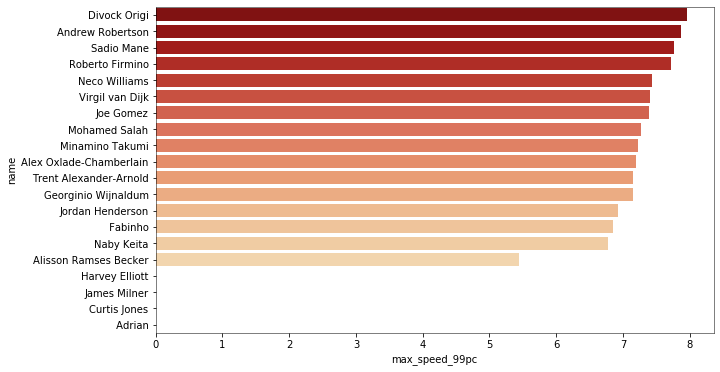

In [50]:
### Max speed visualization
ax_bottom = sns.barplot(y = 'name',
                        x = 'max_speed_99pc',
                        data = summary_stats,
                        order = summary_stats.sort_values('max_speed_99pc', ascending = False).name, 
                        palette = 'OrRd_r')

ax_top.set(xlabel='Distance (km)', ylabel='', title = 'Distance covered: Observed (green)/Assumed (grey)')
###

# 4. Acceleration

## 4.1 Compute acceleration

In [51]:
# Acceleration/Decelerations

accelerations = acc_df[acc_df >= 2]
accelerations = accelerations.notnull()

decelerations = acc_df[acc_df <= -2]
accelerations = accelerations.notnull()

# To do: count sequences of True over 7 occurences (0.7 seconds acc/dec) without repeating after 7 instances
# Plot against distance covered

Smooothing of acceleration values shall not be needed since we smoothed the velocities and computed acceleration from this. This means that we should have removed most of the noise in the data already.

## 4.2 Decompose into acceleration/deceleration zones 

In [52]:
#TBD

# 5. Acceleration/Deceleration profiles

In [53]:
# TBD

# 6. Sequences of peak intensity

In [54]:
# TBD

# 7. Metabolic power

In [55]:
# Trying out Suds code here.

# Introduce concept of metabolic power and SPI
def split_at(s, c, n):
    words = s.split(c)
    return c.join(words[:n]), c.join(words[n:])

def metabolic_cost(acc): #https://jeb.biologists.org/content/221/15/jeb182303
    if acc == np.nan:
        cost = 0
    elif acc > 0:
        cost = 0.102 * ((acc ** 2 + 96.2) ** 0.5) * (4.03 * acc + 3.6 * np.exp(-0.408 * acc))
    elif acc < 0:
        cost = 0.102 * ((acc ** 2 + 96.2) ** 0.5) * (-0.85 * acc + 3.6 * np.exp(1.33 * acc))
    else:
        cost = 0
    return cost

In [56]:
# Plot the metabolic power over time.
# Do changepoint detection.
# We have a gap of missing data, that complicates things...
def metabolic_power(team, playerids):
    for player in playerids:
        mc_temp = list(map(lambda x: metabolic_cost(team[player + '_SG5_acc'][x-1]), range(1, len(team[player + '_SG5_acc'])+1)))
        mp_temp = mc_temp * team[player+'_SG5_speed']
        test_mp = mp_temp.rolling(3000,min_periods=1).apply(lambda x : np.nansum(x)) # We have 10frames/sec * 60sec * 5min = 3000 frames sample
        plt.plot(test_mp)
        plt.title('Metabolic Power Output [5 min Rolling Window]')
        
        #Bin Seg
        signal = np.array(test_mp[3000:len(test_mp)]).reshape((len(test_mp[3000:len(test_mp)]),1))
        algo = rpt.Binseg(model="l2").fit(signal)  ##potentially finding spot where substitution should happen
        result = algo.predict(n_bkps=1)  # big_seg
        rpt.show.display(signal, result, figsize=(10, 6))
        plt.title('Metabolic Power Output [5 min Rolling Window]')    
        
        #PELT
        # The gap in our data (see between 30000-40000) breaks the logic. 
        # Have to take a first sample
        signalSmpl1 = signal[0:25000]
        algo = rpt.Pelt(model="l2",min_size=3000).fit(signalSmpl1)
        result = algo.predict(pen=np.log(len(signal))*1*np.std(signalSmpl1)**2) ##Potentially pacing strategy or identifying moments in the game that are slower
        rpt.show.display(signal, result, figsize=(10, 6))
        plt.title('Metabolic Power Output [5 min Rolling Window]')

/Users/s78920/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


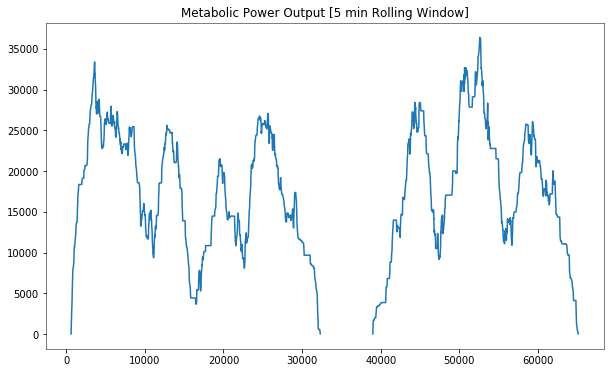

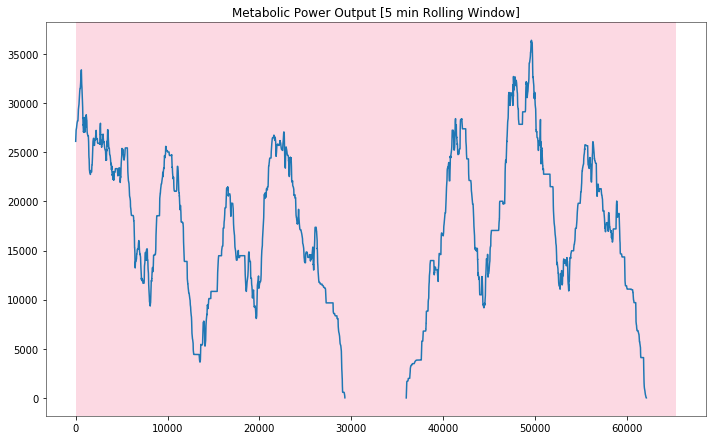

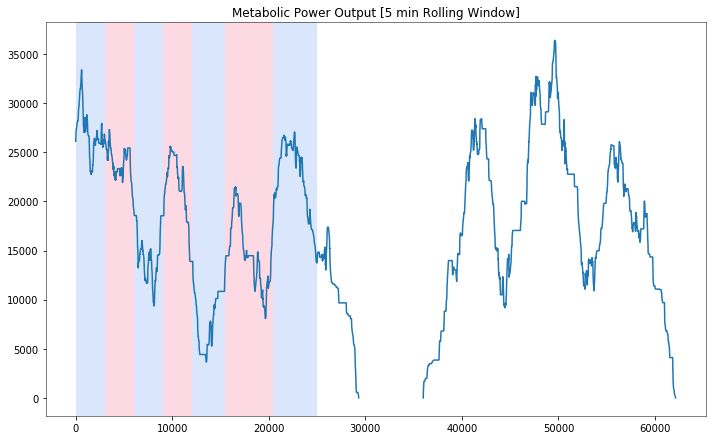

In [57]:
# Plot all players
# metabolic_power(calc_df, map(str,lfc_list)) 

# Plot one player
player = '9449'
metabolic_power(calc_df, ['9449'])  